In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras import datasets, layers, models
from mlxtend.data import loadlocal_mnist
from keras.utils import np_utils

In [2]:
(X_train,y_train), (X_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


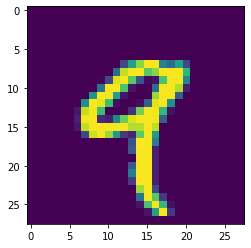

In [3]:
plt.imshow(X_train[4])

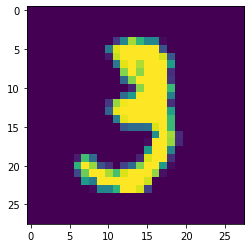

In [4]:
plt.imshow(X_train[10])

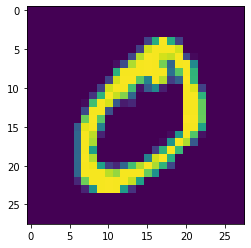

In [5]:
plt.imshow(X_train[1])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
number_pix=X_train.shape[1]*X_train.shape[2] 
X_train=X_train.reshape(X_train.shape[0], 1,28,28).astype('float32')
X_test=X_test.reshape(X_test.shape[0], 1,28,28).astype('float32')

In [8]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [9]:
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

In [12]:
model=models.Sequential()
model.add(layers.Conv2D(32,5,5, padding='same',input_shape=(1,28,28), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 4s - loss: 0.7779 - accuracy: 0.7593 - val_loss: 0.3131 - val_accuracy: 0.9056 - 4s/epoch - 13ms/step
Epoch 2/10
300/300 - 3s - loss: 0.3520 - accuracy: 0.8914 - val_loss: 0.2162 - val_accuracy: 0.9360 - 3s/epoch - 11ms/step
Epoch 3/10
300/300 - 3s - loss: 0.2840 - accuracy: 0.9121 - val_loss: 0.1780 - val_accuracy: 0.9468 - 3s/epoch - 10ms/step
Epoch 4/10
300/300 - 3s - loss: 0.2491 - accuracy: 0.9215 - val_loss: 0.1593 - val_accuracy: 0.9521 - 3s/epoch - 10ms/step
Epoch 5/10
300/300 - 3s - loss: 0.2265 - accuracy: 0.9286 - val_loss: 0.1450 - val_accuracy: 0.9560 - 3s/epoch - 10ms/step
Epoch 6/10
300/300 - 3s - loss: 0.2062 - accuracy: 0.9354 - val_loss: 0.1315 - val_accuracy: 0.9602 - 3s/epoch - 10ms/step
Epoch 7/10
300/300 - 3s - loss: 0.1956 - accuracy: 0.9395 - val_loss: 0.1206 - val_accuracy: 0.9623 - 3s/epoch - 10ms/step
Epoch 8/10
300/300 - 3s - loss: 0.1816 - accuracy: 0.9441 - val_loss: 0.1114 - val_accuracy: 0.9658 - 3s/epoch - 10ms/step
Epoch 9/10
300/3

In [14]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.1037 - accuracy: 0.9676 - 922ms/epoch - 3ms/step


In [15]:
test_acc

0.9675999879837036